Alright, the purpose of this tutorial is to show how with the template set I can calculate the percent of a fit is dominated by a recent burst and the percent which is the base galaxy.

While this might seem fairly easy if the burst was characterized by two kinds of temples: galaxy templates and burst template(s). In that case, I would just see the mass contributed by each template and wipe my hands on my pants and call it a day.

However, to set a prior on the max size of the burst, I had to be fancy with its implementation (:D). Thus we have the tutorial notebook to explain how to figure this out.

The goal is still the same, but the method is slightly different (just a little).

Just like the other tutorials (if you've seen them), I mean to recreate a plot from the paper to explain how I got it. I use the Hainline et al. data like in my paper. See the paper! Download it! Cite it! Talk all about it!

# Step 0: 

Setup all which you need!

In [1]:
# imports (does 'imports' make you think of the wine? im-port wine? hah hah hah
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

import eazy

import ares

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# add eazycode path for ease
import warnings

import os

%env EAZYCODE=/Users/judahluberto/python_packages/eazy-py/eazy-photoz

env: EAZYCODE=/Users/judahluberto/python_packages/eazy-py/eazy-photoz


# Step 1: Run EAZY

Create and run the EAZY instance. I need the fitting coefficients.

In [3]:
params = {}

# paths and such and stuff
# which I need to use for EAZY

# CHANGE THIS FILE BELOW IF YOU WANT TO DO IT WITH OTHER DATASETS
params['CATALOG_FILE'] = '/Users/judahluberto/hainline_2023_highz_changed.csv'

params['FILTERS_RES'] = '/Users/judahluberto/python_packages/eazy-py/eazy-photoz/filters/FILTER.RES.latest'

params['MAIN_OUTPUT_FILE'] = '/Users/judahluberto/python_packages/eazy-py/eazy/outputs'

# igm absorption
params['APPLY_IGM'] = True

# z (NOTE: I am doing z_step = 0.1, which aligns with the templates, to avoid issues with the SFH creation)
# if the steps do not match the template set, I run into issues where z_phot ~ z where template gal starts SF
params['Z_STEP'] = 0.1
params['Z_MIN'] = 1
params['Z_MAX'] = 20.
params['Z_STEP_TYPE'] = 0

# making sure there is a constant prior in the P(z)
params['PRIOR_ABZP'] = 23.9
params['PRIOR_FILE'] = '/Users/judahluberto/constant_prior.txt'
params['PRIOR_FILTER'] = 375

# I don't want EAZY to tell me everything
params['VERBOSITY'] = 0

# the template file

# CHANGE THIS IF YOU WANT A DIFFERENT TEMPLATE SET (e.g. THE LYA VERSION)
params['TEMPLATES_FILE'] = 'templates/Luberto_et_al_WITHOUT_LYA/ARES.param'
params['WAVELENGTH_FILE'] = 'templates/Luberto_et_al_WITHOUT_LYA/wavelengths.def'

# template error
params['TEMP_ERR_FILE'] = 'templates/template_error_cosmos2020.txt'

In [4]:
# so eazy can translate the filters
translate_file = os.path.join(os.getenv('EAZYCODE'), 'inputs/zphot.translate')

In [5]:
# create EAZY instance
# which creates the tempfilt array, explained in the README of the repo
without_lya = eazy.photoz.PhotoZ(param_file=None, translate_file=translate_file, zeropoint_file=None, 
                          params=params, load_prior=True, load_products=False)

Read default param file: /Users/judahluberto/opt/anaconda3/lib/python3.9/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: /Users/judahluberto/hainline_2023_highz_changed.csv
   >>> NOBJ = 715
f_f606w e_f606w ( 14): hst/wfpc2_f606w.dat
f_f814w e_f814w ( 16): hst/wfpc2_f814w.dat
f_f444w e_f444w (377): jwst_nircam_f444w
f_f200w e_f200w (366): jwst_nircam_f200w
f_f356w e_f356w (376): jwst_nircam_f356w
f_f277w e_f277w (375): jwst_nircam_f277w
f_f070w e_f070w (362): jwst_nircam_f070w
f_f115w e_f115w (364): jwst_nircam_f115w
f_f090w e_f090w (350): jwst_niriss_f090w
f_f150w e_f150w (365): jwst_nircam_f150w
f_f410m e_f410m (383): jwst_nircam_f410m
f_f182m e_f182m (370): jwst_nircam_f182m
f_f210m e_f210m (271): RestUV/Tophat_1700_200.dat
f_f335m e_f335m (381): jwst_nircam_f335m
f_f430m e_f430m (384): jwst_nircam_f430m
f_f435w e_f435w (233): hst/ACS_update_sep07/wfc_f435w_t81.dat
f_f775w e_f775w (216): hst/wfc3/UVIS/f775w.dat
f_f850lp e_f850lp ( 17): hst/wfpc2_f850lp.dat
Read PRIOR_

  0%|                                                    | 0/26 [00:00<?, ?it/s]<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

Template   0: ARES_index=25.fits (NZ=131).
Template   1: ARES_index=50.fits (NZ=131).
Template   2: ARES_index=75.fits (NZ=131).
Template   3: ARES_index=100.fits (NZ=131).
Template   4: ARES_index=150.fits (NZ=131).
Template   5: ARES_index=200.fits (NZ=131).
Template   6: ARES_index=250.fits (NZ=131).
Template   7: ARES_index=300.fits (NZ=131).
Template   8: ARES_index=350.fits (NZ=131).
Template   9: ARES_index=400.fits (NZ=131).
Template  10: ARES_index=500.fits (NZ=131).
Template  11: ARES_index=600.fits (NZ=131).
Template  12: ARES_index=700.fits (NZ=131).
Template  13: ARES_index=25_burst.fits (NZ=131).
Template  14: ARES_index=50_burst.fits (NZ=131).
Template  15: ARES_index=75_burst.fits (NZ=131).
Template  16: ARES_index=100_burst.fits (NZ=131).
Template  17: ARES_index=150_burst.fits (NZ=131).
Template  18: ARES_index=200_burst.fits (NZ=131).
Template  19: ARES_index=250_burst.fits (NZ=131).
Template  20: ARES_index=300_burst.fits (NZ=131).
Template  21: ARES_index=350_burst

190it [00:00, 6191.58it/s]


In [6]:
# Full catalog
without_lya.set_sys_err(positive=True)
sample = np.isfinite(without_lya.ZSPEC)

# perform the fits!
without_lya.fit_catalog(without_lya.idx[sample], n_proc=8)

  0%|                                                   | 0/190 [00:00<?, ?it/s]<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C head

Compute best fits
fit_best: 0.7 s (n_proc=1,  NOBJ=714)
Fit 17.4 s (n_proc=8, NOBJ=715)


In [7]:
# get the parameters I want
# I pulled this from an EAZY demo...
warnings.simplefilter('ignore', category=RuntimeWarning)

zout_without_lya, hdu = without_lya.standard_output(simple=False, 
                                 rf_pad_width=0.5, rf_max_err=2, 
                                 prior=True, beta_prior=True, 
                                 absmag_filters=[], 
                                 extra_rf_filters=[],
                                 template_fnu_units=u.Lsun/u.Hz)

fit_best: 0.8 s (n_proc=1,  NOBJ=714)


100%|████████████████████████████████████████| 714/714 [00:03<00:00, 208.64it/s]


# Step 2: Setup for this

Such as getting some arrays that are useful. And setting up a function.

In [8]:
# you can get these by running an ARES instance, but let's just load them here
redshifts = np.loadtxt('ares_z.txt')
times = np.loadtxt('ares_t.txt')

# files of the SFHs and stellar masses OF THE TEMPLATES (in order)
#sfhs = np.loadtxt('ares_sfhs.txt')
stellarmasses = np.loadtxt('ares_stellarmasses.txt')

I need to convert the coeffs into physical values to directly get the stellar mass contributions.

In [9]:
cosmology = ares.physics.Cosmology()

def calc_to_physical(eazyinstance, gal):
    # I need the luminosity distance
    dL = cosmology.LuminosityDistance(eazyinstance.zbest[gal]) * u.cm

    # and also to convert between units
    fnu_units = u.erg/u.s/u.cm**2/u.Hz
    uJy_to_cgs = u.microJansky.to(u.erg/u.s/u.cm**2/u.Hz)

    fnu_scl = 10**(-0.4*(23.9-23.9))*uJy_to_cgs

    to_physical = fnu_scl*fnu_units*4*np.pi*dL**2/(1+eazyinstance.zbest[gal])
    to_physical /= (1*u.Lsun/u.Hz).to(u.erg/u.second/u.Hz)
    
    return to_physical

If in the paper I define bustiness as

$$
\mathrm{B = \frac{M_{bust}}{M_{burst} +  + M_{gal}}}
$$

And here I define the burst as

$$
f  = \mathrm{\frac{M_{burst}}{M_{gal}}}
$$

Then the equation becomes

$$
\mathrm{B} = \frac{f \mathrm{M_{gal}}}{\mathrm{M_{burst} +  + M_{gal}}}
$$

And the solution to finding what $f$ should be given a desired $\mathrm{B}$ is

$$
f = \mathrm{\frac{B}{1 - B}}.
$$

In [10]:
# therefore I get a max burst of:
max_burst = 0.5

Here's a function which adds some amount of burst to the native SFHs in EAZY at 10 Myr before observation. I need to do this for each object because the burst is always 5 Myr before observation, and each object is observed at a different spot.

So I add the burst to the ARES template SFHs for our "set" which has the burst component (explained more in the paper).

In [11]:
# a function to get the burst SFHs in a way that I want!
def burst_sfhs(zbest_i, burst_t_i):
    # multiplicative factor for burst for each ARES gal
    burst_amounts = stellarmasses[:, zbest_i] * max_burst
    
    # get the burst contributions for each ARES gal
    burst_array = np.tile(burst_add, (stellarmasses.shape[0], 1)) * burst_amounts[:, np.newaxis]
    
    # add to the sfhs for each ARES gal
    sfhs_copy = sfhs.copy()
    
    sfhs_copy[:, burst_t_i:zbest_i+1] += burst_array
    
    return sfhs_copy

# Step 3: Find the burstiness

To ready ourselves up for finding the burstiness, we have to realize that 

In [12]:
# fitting coeffs
coeffs_without = without_lya.coeffs_best

In [13]:
perc_burst_without = list()
for index, zfit in enumerate(without_lya.zbest):
    zi_temp = abs(redshifts - zfit).argmin()
    
    # convert coeffs from EAZY into physical units
    coeffs_physical = coeffs_without * calc_to_physical(without_lya, index)
    
    # get mass formed not by burst (regular gal formation) and by bursts
    mass_gals = np.sum(stellarmasses[:, zi_temp] * (coeffs_physical[index, :stellarmasses.shape[0]] + coeffs_physical[index, stellarmasses.shape[0]:])).value
    mass_burst = np.sum(stellarmasses[:, zi_temp] * coeffs_physical[index, stellarmasses.shape[0]:] * max_burst).value
    
    perc_burst_without.append(mass_burst / (mass_gals + mass_burst))
    
perc_burst_without = np.array(perc_burst_without)

# Step 4: Split into low, mid, and high mass gals.

I split the gals up for the paper plot. This is a lot like what I'm doing in the SFHs tutorial, but I'm doing it here as well.

I need to get the total stellar mass...I could pull it from EAZY, but just to make sure I am creating an ARES instance, calculating the stellar mass growth history, and getting the exact stellar mass. 

Secretly, I am doing this here because my code to get the paper plots combined the information in this tutorial and the finding SFHs tutorial, and I'm splitting the code into two for the sake of showing off how to do what I did. But there was overlap...as you can tell.

However, the real point of this tutorial is to show how I can get the burst percentage, which was done above, so I don't feel too bad about doing this here.

In [14]:
# my arrays of high mid low mass etc
# for 8 < z < 10
is_low_mass_8_to_10 = (5e7 > zout_without_lya['mass']) \
                      & (8 < without_lya.zbest) & (without_lya.zbest < 10)
is_mid_mass_8_to_10 = (5e7 < zout_without_lya['mass']) & (zout_without_lya['mass'] < 5e8) \
                      & (8 < without_lya.zbest) & (without_lya.zbest < 10)
is_high_mass_8_to_10 = (zout_without_lya['mass'] > 5e8) & (8 < without_lya.zbest) & (without_lya.zbest < 10)

# for 10
is_low_mass_10_to_12 = (5e7 > zout_without_lya['mass']) \
                      & (10 < without_lya.zbest) & (without_lya.zbest < 12)
is_mid_mass_10_to_12 = (5e7 < zout_without_lya['mass']) & (zout_without_lya['mass'] < 5e8) \
                      & (10 < without_lya.zbest) & (without_lya.zbest < 12)
is_high_mass_10_to_12 = (zout_without_lya['mass'] > 5e8) & (10 < without_lya.zbest) & (without_lya.zbest < 12)

# Step 4: Make the plot I have in the paper!

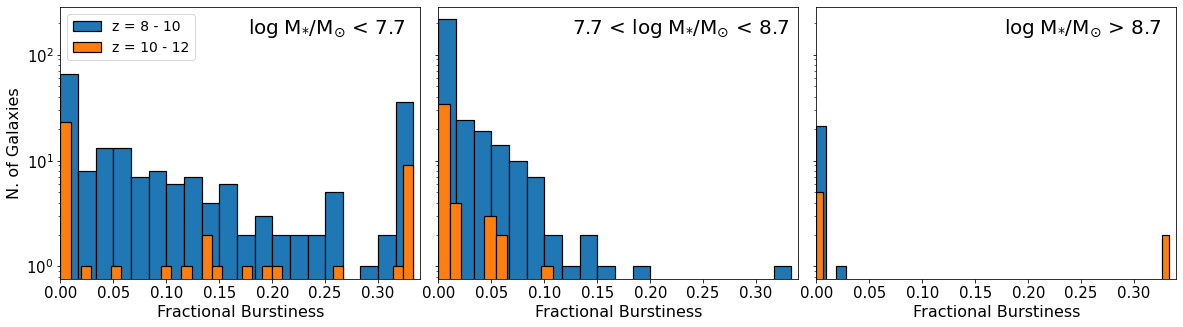

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(20,5), sharey=True, sharex=True)

fig.subplots_adjust(wspace=0.05)

axs[0].hist(perc_burst_without[is_low_mass_8_to_10], bins=20, edgecolor='black', linewidth=1.2, label='z = 8 - 10')#, density=True)
axs[0].hist(perc_burst_without[is_low_mass_10_to_12], bins=35, edgecolor='black', linewidth=1.2, label='z = 10 - 12')#, density=True)

axs[1].hist(perc_burst_without[is_mid_mass_8_to_10], bins=20, edgecolor='black', linewidth=1.2)#, density=True)
axs[1].hist(perc_burst_without[is_mid_mass_10_to_12], bins=10, edgecolor='black', linewidth=1.2)#, density=True)

axs[2].hist(perc_burst_without[is_high_mass_8_to_10], bins=3, edgecolor='black', linewidth=1.2)#, density=True)
axs[2].hist(perc_burst_without[is_high_mass_10_to_12], bins=50, edgecolor='black', linewidth=1.2)#, density=True)

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[2].set_yscale('log')

axs[0].set_xlim(0, 0.34)
axs[1].set_xlim(0, 0.34)
axs[2].set_xlim(0, 0.34)

axs[0].set_ylabel('N. of Galaxies', fontsize=16)
axs[0].set_xlabel('Fractional Burstiness', fontsize=16)
axs[1].set_xlabel('Fractional Burstiness', fontsize=16)
axs[2].set_xlabel('Fractional Burstiness', fontsize=16)

axs[0].tick_params(axis='both', which='major', labelsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

axs[0].legend(fontsize=14, loc='upper left')

axs[0].text(0.52, 0.9, r'$\rm{log \;} M_{*} / M_{\odot}$ < 7.7', transform=axs[0].transAxes, fontsize=20)
axs[1].text(0.37, 0.9, r'7.7 < $\rm{log \;} M_{*} / M_{\odot}$ < 8.7', transform=axs[1].transAxes, fontsize=20)
axs[2].text(0.52, 0.9, r'$\rm{log \;} M_{*} / M_{\odot}$ > 8.7', transform=axs[2].transAxes, fontsize=20)

#plt.savefig('hainline_bursts.pdf', bbox_inches='tight')

plt.show()